In [1]:
import matplotlib.pyplot as plt
import numpy as np
from functions.CreateYarnGeneral import CreateYarn

In [2]:

import os,sys,shutil

# remove output folder if exists
try: 
    shutil.rmtree("output")
except: 
    pass

# create output folder
os.makedirs("output")
os.makedirs("output/mesh")
os.makedirs("output/ccx")

In [3]:
# cualquier curva periodica puede ser describida por una serie de fourier

r = 5

trajs =[]  
# =============================================================================

nq = 2
fc1 = lambda x: (r**nq - x**nq)**(1/nq)

x12 = np.linspace(0,r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )

# =============================================================================

nq = 2
fc1 = lambda x: -(r**nq - (x-2*r)**nq)**(1/nq) + 2*r

x12 = np.linspace(r,2*r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )

# =============================================================================




In [4]:
r = 5

trajs =[]  
# =============================================================================

nq = 2
fc1 = lambda x: r*np.cos(0.5*np.pi*x/r)

x12 = np.linspace(0,r,2000)
y12 = fc1(x12)

trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )

# =============================================================================

nq = 2
fc1 = lambda x: r*np.cos(0.5*np.pi*x/r) + 2*r
# 
x12 = np.linspace(r,2*r,2000)
y12 = fc1(x12)
# 
trajs.append( np.array([x12,y12, np.zeros_like(x12)]).T )

# =============================================================================


In [5]:
trajs

[array([[0.00000000e+00, 5.00000000e+00, 0.00000000e+00],
        [2.50125063e-03, 4.99999846e+00, 0.00000000e+00],
        [5.00250125e-03, 4.99999383e+00, 0.00000000e+00],
        ...,
        [4.99499750e+00, 7.85790735e-03, 0.00000000e+00],
        [4.99749875e+00, 3.92895489e-03, 0.00000000e+00],
        [5.00000000e+00, 3.06161700e-16, 0.00000000e+00]], shape=(2000, 3)),
 array([[ 5.        , 10.        ,  0.        ],
        [ 5.00250125,  9.99607105,  0.        ],
        [ 5.0050025 ,  9.99214209,  0.        ],
        ...,
        [ 9.9949975 ,  5.00000617,  0.        ],
        [ 9.99749875,  5.00000154,  0.        ],
        [10.        ,  5.        ,  0.        ]], shape=(2000, 3))]

(np.float64(-0.5),
 np.float64(10.5),
 np.float64(-0.49999999999999967),
 np.float64(10.5))

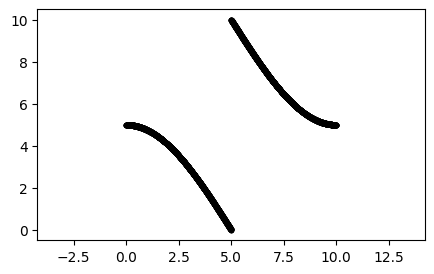

In [6]:

fig = plt.figure()
fig.set_size_inches(5, 3)
# compute fourier coefficients
for itraj in trajs:

    plt.plot(itraj[:,0], itraj[:,1], 'k.-')

plt.axis('equal')

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Datos iniciales
Nx = 6
Ny = 6
all_points = np.concatenate(trajs)
Lx = np.max(all_points[:, 0]) - np.min(all_points[:, 0])
Ly = np.max(all_points[:, 1]) - np.min(all_points[:, 1])
x0 = np.min(all_points[:, 0])
y0 = np.min(all_points[:, 1])



# Réplica de trayectorias
all_trajs_1 = []
for ix in range(Nx):
    for iy in range(Ny):
        for itraj in trajs:
            new_traj = np.copy(itraj)
            if ix % 2 == 1:
                new_traj[:, 0] = -new_traj[:, 0] + Lx
                # reverse
                new_traj = new_traj[::-1]


            new_traj[:, 0] += ix * Lx
            new_traj[:, 1] += iy * Ly
                
            all_trajs_1.append(new_traj)



In [8]:
# Creación otra capa de trayectorias

# toma los iniciales y los gira en z  y los traslada

all_trajs_2 = []

rot_z = np.pi/2
matrix = np.array([[np.cos(rot_z), -np.sin(rot_z), 0],
                     [np.sin(rot_z), np.cos(rot_z), 0],
                     [0, 0, 1]])

all_points = np.concatenate(all_trajs_1)
xmu = np.mean(all_points[:, 0])
ymu = np.mean(all_points[:, 1])

for itraj in all_trajs_1:
    new_traj = np.copy(itraj)
    new_traj[:, 0] = itraj[:, 0] - xmu
    new_traj[:, 1] = itraj[:, 1] - ymu
    new_traj = np.dot(new_traj, matrix.T)
    new_traj[:, 0] += xmu
    new_traj[:, 1] += ymu
    

    all_trajs_2.append(new_traj)

    


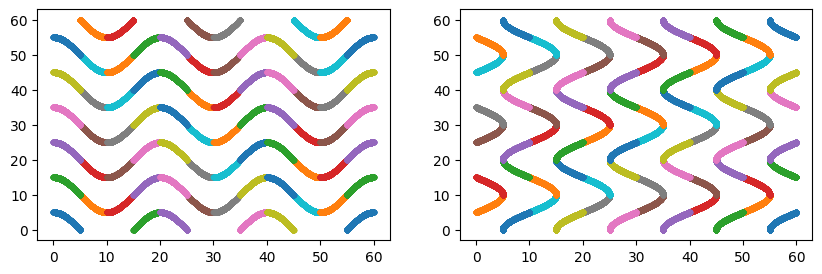

In [9]:
# Visualización
fig = plt.figure()
fig.set_size_inches(10, 3)
plt.subplot(1, 2, 1)
for itraj in all_trajs_1:
    plt.plot(itraj[:, 0], itraj[:, 1], '.-')
plt.subplot(1, 2, 2)
for itraj in all_trajs_2:
    plt.plot(itraj[:, 0], itraj[:, 1], '.-')
plt.show()

(0.0, 40.0)

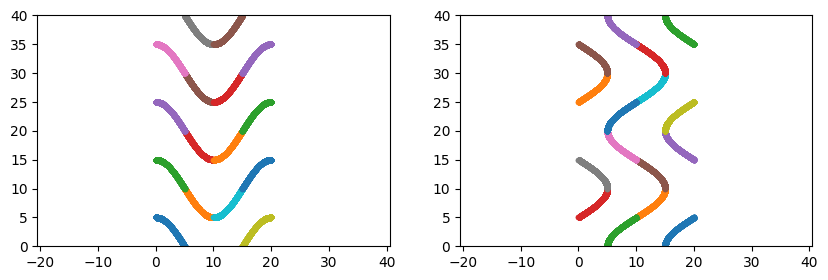

In [10]:
# Select only x in [0,2*Lx] and y in [0,4*Ly]
Nx_sel = 2
Ny_sel = 4
cond = lambda x,y: np.min(x) >= -1e2           and \
                   np.max(x) <= Nx_sel * Lx + 1e-2 and \
                   np.min(y) >= -1e-2           and \
                   np.max(y) <= Ny_sel * Ly + 1e-2

all_trajs_1 = [itraj for itraj in all_trajs_1 if cond(itraj[:, 0], itraj[:, 1])]
all_trajs_2 = [itraj for itraj in all_trajs_2 if cond(itraj[:, 0], itraj[:, 1])]

# Visualización
fig = plt.figure()
fig.set_size_inches(10, 3)
plt.subplot(1, 2, 1)
for itraj in all_trajs_1:
    plt.plot(itraj[:, 0], itraj[:, 1], '.-')
# aspect ratio 
plt.axis('equal')
plt.xlim([0, Nx_sel * Lx])

plt.ylim([0, Ny_sel * Ly])
plt.subplot(1, 2, 2)
for itraj in all_trajs_2:
    plt.plot(itraj[:, 0], itraj[:, 1], '.-')
plt.axis('equal')
plt.xlim([0, Nx_sel * Lx])
plt.ylim([0, Ny_sel * Ly])


In [11]:
from CompositeSandwich.CombineTrajs import CombineTrajs

trajs_1 = CombineTrajs(all_trajs_1)
trajs_2 = CombineTrajs(all_trajs_2)

trajs_layers =[trajs_1, trajs_2]

(0.0, 40.0)

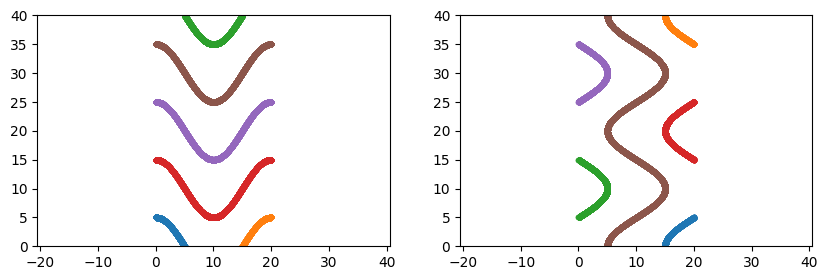

In [12]:

fig = plt.figure()
fig.set_size_inches(10, 3)
plt.subplot(1, 2, 1)
for itraj in trajs_1:
    plt.plot(itraj[:, 0], itraj[:, 1], '.-')
# aspect ratio 
plt.axis('equal')
plt.xlim([0, Nx_sel * Lx])

plt.ylim([0, Ny_sel * Ly])
plt.subplot(1, 2, 2)
for itraj in trajs_2:
    plt.plot(itraj[:, 0], itraj[:, 1], '.-')
plt.axis('equal')
plt.xlim([0, Nx_sel * Lx])
plt.ylim([0, Ny_sel * Ly])


In [13]:
radius = 1.25

for j,trajs in enumerate(trajs_layers):
    for i,itraj in enumerate(trajs):

        file = "output/mesh/layer_{}_yarn_{}.brep".format(j+1,i+1)

        CreateYarn({"trajs": itraj, 
                    "radius": radius, 
                    "density": 1.25,
                    "file": file})

In [14]:
from CompositeSandwich.CreateCompositeSandwich import CreateCompositeSandwich

In [15]:
import glob

files = glob.glob("output/mesh/*.brep")
files = sorted(files)
files

['output/mesh\\layer_1_yarn_1.brep',
 'output/mesh\\layer_1_yarn_2.brep',
 'output/mesh\\layer_1_yarn_3.brep',
 'output/mesh\\layer_1_yarn_4.brep',
 'output/mesh\\layer_1_yarn_5.brep',
 'output/mesh\\layer_1_yarn_6.brep',
 'output/mesh\\layer_2_yarn_1.brep',
 'output/mesh\\layer_2_yarn_2.brep',
 'output/mesh\\layer_2_yarn_3.brep',
 'output/mesh\\layer_2_yarn_4.brep',
 'output/mesh\\layer_2_yarn_5.brep',
 'output/mesh\\layer_2_yarn_6.brep']

In [16]:
params_mesh = {
    "files": files,
    "inp_file": "output/mesh/sandwich.inp",
    "trajs_layers": trajs_layers,
    "radius": radius,
    "r": r,
    "NLayers": 2,
}

CreateCompositeSandwich(params_mesh);

In [17]:
from CompositeSandwich.Simulation import Simulation

In [18]:
from validation.experimental import carbonfiber,resina

In [19]:
carbon_data = carbonfiber()
resina_data = resina()

In [20]:
Ecarbon_MPa = carbon_data["carbon"].iloc[0]["Young Modulus (GPa)"]*1e-3
poisson_carbon = carbon_data["poisson ratio"]

In [21]:
materials = {
    "matrix": { "E" : resina_data["young modulus [MPa]"], 
                "nu": resina_data["poisson ratio"] },
    "carbon": { "E" : Ecarbon_MPa, 
                "nu": poisson_carbon }
}


opts = {
    "OMP_NUM_THREADS":3,
    "mpi_np":3,
    "mpi":True,
    "ccx": r"C:\Users\djoroya\Downloads\PrePoMax v2.2.0\PrePoMax v2.2.0\Solver\ccx_dynamic"

}
params_sim = {
    "mesh": params_mesh,
    "output": "output/ccx/",
    "epsilon": 0.125,
    "nsteps":5,
    "materials": materials,
    "opts": opts,
}



In [22]:
# export PARDISO_MPI_MATCHING=1
import os
os.environ["PARDISO_MPI_MATCHING"] = "2"

In [23]:
frd = Simulation(params_sim)

Running Calculix at:  output/ccx/
Output file:  c:\Users\djoroya\Documents\GitHub\CITISENS_Composite\scripts\SandwichRVE\output\ccx\out.txt
Command:
 mpiexec -n 3 C:\Users\djoroya\Downloads\PrePoMax_SEP_v2.2.0\PrePoMax_SEP_v2.2.0\Solver\ccx_dynamic main
Error reading cvf file

pid:  13736 

Calculix finished

